In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dados = pd.read_csv('datatran2024.csv',encoding='ISO-8859-1',sep=';', low_memory=False)
dados


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789,01/01/2024,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804,01/01/2024,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,"-4,29603281","-41,76732659",SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806,01/01/2024,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818,01/01/2024,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838,01/01/2024,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60360,642043,17/09/2024,terça-feira,03:00:00,PR,116,39,CAMPINA GRANDE DO SUL,Velocidade Incompatível,Saída de leito carroçável,...,0,2,0,1,1,"-25,156168","-48,8613401",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
60361,642079,27/10/2024,domingo,02:30:00,SP,116,"111,5",TAUBATE,Ingestão de álcool pelo condutor,Capotamento,...,0,1,1,0,2,"-23,03887149","-45,56097419",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
60362,642188,07/06/2024,sexta-feira,11:40:00,PA,230,995,RUROPOLIS,Acumulo de areia ou detritos sobre o pavimento,Colisão com objeto,...,0,2,0,0,1,"-4,08910809","-54,859784",SPRF-PA,DEL05-PA,UOP01-DEL05-PA
60363,642258,03/08/2024,sábado,13:58:00,PI,343,"645,6",JERUMENHA,Demais falhas mecânicas ou elétricas,Colisão traseira,...,1,0,0,2,2,"-7,040227","-43,41214",SPRF-PI,DEL03-PI,UOP01-DEL03-PI


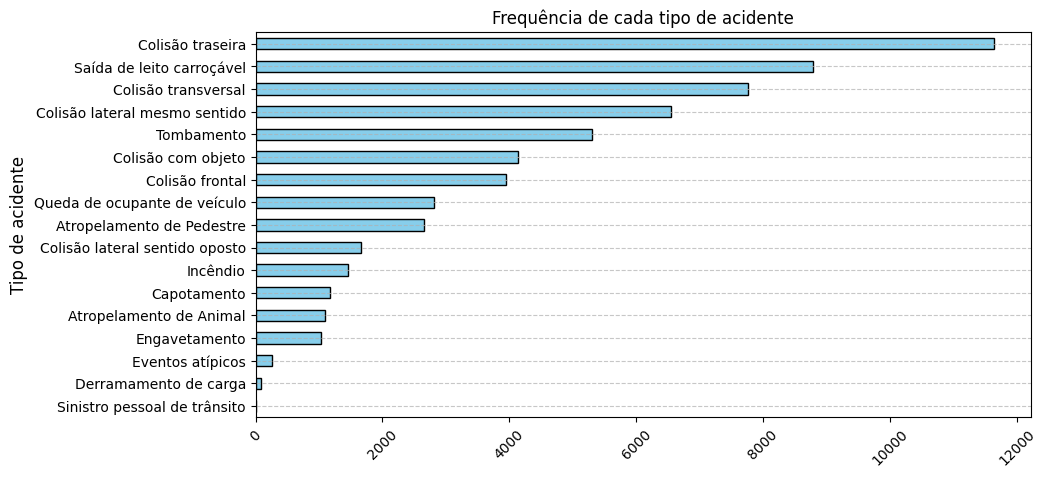

In [3]:
tipo_de_acidente = dados.groupby('tipo_acidente').size().sort_values()

tipo_de_acidente.plot(kind='barh',color ='skyblue',edgecolor='black',figsize=(10,5))
plt.ylabel("Tipo de acidente", fontsize=12)
plt.title('Frequência de cada tipo de acidente')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Frequência de cada tipo de acidente.png')

plt.show()



In [4]:
dados[['pessoas','mortos','feridos_leves','feridos_graves','ilesos','feridos']]

,pessoas,mortos,feridos_leves,feridos_graves,ilesos,feridos
0,3,0,0,1,1,1
1,2,1,0,0,1,0
2,3,1,0,0,1,0
3,2,0,0,1,0,1
4,3,0,0,0,2,0
...,...,...,...,...,...,...
60360,3,0,1,0,2,1
60361,2,0,0,0,1,0
60362,2,0,0,0,2,0
60363,2,0,1,1,0,2


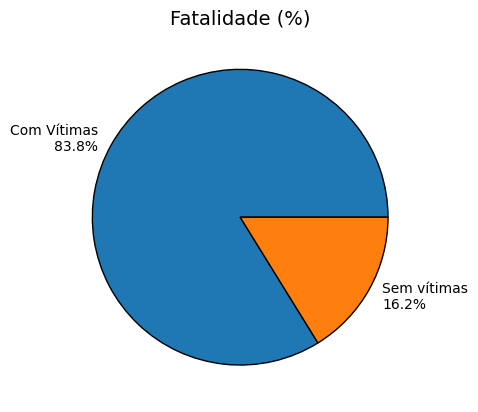

In [5]:
'''proporcao_fatais = len(dados[dados['mortos'] > 0]) / len(dados)
proporcao_sem_Vitimas = len(dados[dados['mortos'] == 0]) / len(dados)
porcentagem_fatais = proporcao_fatais * 100 
porcentagem_sem_vitimas = proporcao_sem_Vitimas * 100'''
acidentes_com_vitimas = dados[(dados['mortos'] > 0) | (dados['feridos'] > 0)]
acidentes_sem_vitimas = dados[(dados['mortos'] == 0) & (dados['feridos'] == 0)]

porcentagem_com_vitimas = len(acidentes_com_vitimas) / len(dados) * 100
porcentagem_sem_vitimas = len(acidentes_sem_vitimas) / len(dados) * 100


'''y =[proporcao_sem_Vitimas,proporcao_fatais]'''
y =[porcentagem_com_vitimas,porcentagem_sem_vitimas]
my_labels = [ f'Com Vítimas\n{porcentagem_com_vitimas:.1f}%',f'Sem vítimas\n{porcentagem_sem_vitimas:.1f}%' ]


plt.pie(y,labels=my_labels,wedgeprops={'edgecolor': 'black', 'linewidth': 1})
plt.title("Fatalidade (%)", fontsize=14)
plt.savefig('Fatalidade.png')
plt.show()





In [6]:
mortos = dados[dados['mortos'] > 0]
causas_mortes = mortos.groupby('causa_acidente').size().sort_values(ascending=False)
#quantiades_mortos = dados['mortos'].sum()
#quantiades_mortos
causas_mortes
tipo_acidente = mortos.groupby('tipo_acidente').size().sort_values(ascending=False)
tipo_acidente

tipo_acidente
Colisão frontal                   1196
Atropelamento de Pedestre          784
Saída de leito carroçável          523
Colisão traseira                   470
Colisão transversal                351
Tombamento                         212
Colisão com objeto                 205
Colisão lateral mesmo sentido      171
Colisão lateral sentido oposto     128
Queda de ocupante de veículo        92
Atropelamento de Animal             60
Capotamento                         40
Engavetamento                       36
Eventos atípicos                    23
Sinistro pessoal de trânsito         3
Incêndio                             2
Derramamento de carga                1
dtype: int64

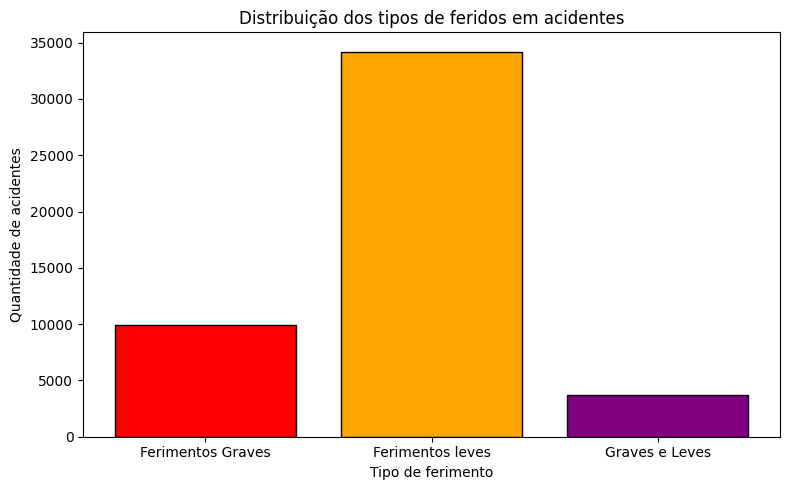

In [7]:
proporçao_feridos = len(dados[dados['feridos'] > 0])
feridos = dados[dados['feridos'] > 0]
feridos_graves = feridos[(feridos['feridos_graves'] > 0) & (feridos['feridos_leves'] == 0)]
feridos_leves = feridos[(feridos['feridos_leves'] > 0) & (feridos['feridos_graves'] == 0)]
ambos = feridos[(feridos['feridos_graves']>0) & (feridos['feridos_leves'] > 0)]

categorias = ['Ferimentos Graves','Ferimentos leves','Graves e Leves']
valores = [len(feridos_graves),len(feridos_leves),len(ambos)]

plt.figure(figsize=(8, 5))
plt.bar(categorias,valores,color=['red', 'orange', 'purple'],edgecolor='black')

plt.title('Distribuição dos tipos de feridos em acidentes')
plt.ylabel('Quantidade de acidentes')
plt.xlabel('Tipo de ferimento')


plt.tight_layout()
plt.show()



In [8]:
causa_feridos_graves = feridos_graves['causa_acidente'].value_counts().reset_index().head(10)
causa_feridos_leves = feridos_leves['causa_acidente'].value_counts().reset_index().head(10)
causa_ambos = ambos['causa_acidente'].value_counts().reset_index().head(10)

causa_feridos_graves.columns = ['Causa do Acidente','Quantidade de Acidentes']
causa_feridos_leves.columns = ['Causa do Acidente','Quantidade de Acidentes']
causa_ambos.columns = ['Causa do Acidente','Quantidade de Acidentes']

display(causa_feridos_leves)
display(causa_feridos_graves)
display(causa_ambos)




,Causa do Acidente,Quantidade de Acidentes
0,Reação tardia ou ineficiente do condutor,5538
1,Ausência de reação do condutor,5159
2,Acessar a via sem observar a presença dos outr...,3408
3,Condutor deixou de manter distância do veículo...,2443
4,Manobra de mudança de faixa,2318
5,Velocidade Incompatível,1984
6,Ingestão de álcool pelo condutor,1216
7,Condutor Dormindo,1048
8,Demais falhas mecânicas ou elétricas,1037
9,Trafegar com motocicleta (ou similar) entre as...,802


,Causa do Acidente,Quantidade de Acidentes
0,Ausência de reação do condutor,1475
1,Reação tardia ou ineficiente do condutor,1326
2,Acessar a via sem observar a presença dos outr...,1213
3,Velocidade Incompatível,624
4,Transitar na contramão,516
5,Condutor deixou de manter distância do veículo...,500
6,Manobra de mudança de faixa,459
7,Ingestão de álcool pelo condutor,378
8,Ultrapassagem Indevida,317
9,Condutor Dormindo,235


,Causa do Acidente,Quantidade de Acidentes
0,Reação tardia ou ineficiente do condutor,447
1,Acessar a via sem observar a presença dos outr...,409
2,Ausência de reação do condutor,401
3,Transitar na contramão,291
4,Velocidade Incompatível,234
5,Manobra de mudança de faixa,202
6,Ultrapassagem Indevida,176
7,Ingestão de álcool pelo condutor,161
8,Condutor deixou de manter distância do veículo...,157
9,Condutor Dormindo,128


In [9]:
ilesos = dados[(dados['ilesos'] > 0) & (dados['feridos'] == 0) & (dados['mortos'] == 0)]
ilesos

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
4,571838,01/01/2024,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,"-16,17914141","-54,78905337",SPRF-MT,DEL02-MT,UOP01-DEL02-MT
9,571957,01/01/2024,segunda-feira,13:30:00,MG,262,"594,4",CAMPOS ALTOS,Pista Escorregadia,Tombamento,...,0,1,0,0,1,"-19,66568189","-46,16901785",SPRF-MG,DEL08-MG,UOP02-DEL08-MG
10,571963,01/01/2024,segunda-feira,17:30:00,MT,364,396,CUIABA,Ultrapassagem Indevida,Colisão lateral mesmo sentido,...,0,3,1,0,3,"-15,69004774","-55,90523988",SPRF-MT,DEL01-MT,UOP02-DEL01-MT
12,571998,01/01/2024,segunda-feira,19:00:00,MS,163,551,BANDEIRANTES,Ausência de reação do condutor,Colisão lateral mesmo sentido,...,0,3,0,0,2,"-19,89996489","-54,37326248",SPRF-MS,DEL01-MS,UOP02-DEL01-MS
15,572015,01/01/2024,segunda-feira,22:30:00,RS,101,22,TRES CACHOEIRAS,Ausência de reação do condutor,Colisão lateral mesmo sentido,...,0,3,2,0,4,"-29,4398072","-49,90113887",SPRF-RS,DEL03-RS,UOP02-DEL03-RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60344,641329,31/10/2024,quinta-feira,20:15:00,MG,381,939,EXTREMA,Ausência de reação do condutor,Colisão traseira,...,0,2,0,0,2,"-22,82017512","-46,2991333",SPRF-MG,DEL16-MG,UOP03-DEL16-MG
60357,641847,25/10/2024,sexta-feira,10:40:00,MT,163,832,SINOP,Ausência de reação do condutor,Colisão lateral mesmo sentido,...,0,1,1,0,2,"-11,88225359","-55,5008949",SPRF-MT,DEL06-MT,UOP02-DEL06-MT
60361,642079,27/10/2024,domingo,02:30:00,SP,116,"111,5",TAUBATE,Ingestão de álcool pelo condutor,Capotamento,...,0,1,1,0,2,"-23,03887149","-45,56097419",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
60362,642188,07/06/2024,sexta-feira,11:40:00,PA,230,995,RUROPOLIS,Acumulo de areia ou detritos sobre o pavimento,Colisão com objeto,...,0,2,0,0,1,"-4,08910809","-54,859784",SPRF-PA,DEL05-PA,UOP01-DEL05-PA


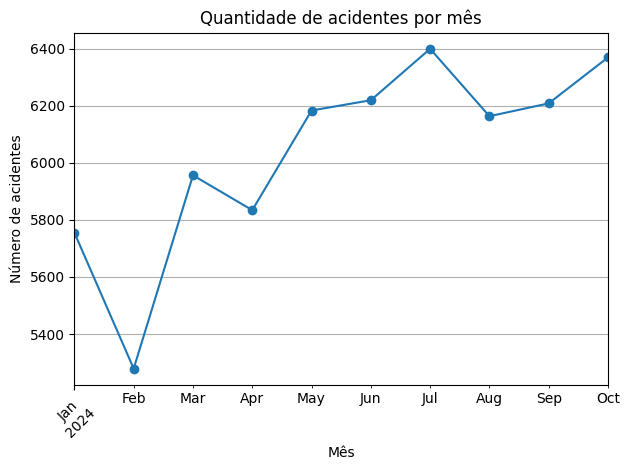

In [10]:
dados['data_inversa'] = pd.to_datetime(dados['data_inversa'], format='%d/%m/%Y')
dados['mes_ano'] = dados['data_inversa'].dt.to_period('M')
acidentes_por_mes = dados['mes_ano'].value_counts().sort_index()
acidentes_por_mes.plot(kind='line', marker='o')
plt.title('Quantidade de acidentes por mês')
plt.xlabel('Mês')
plt.ylabel('Número de acidentes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



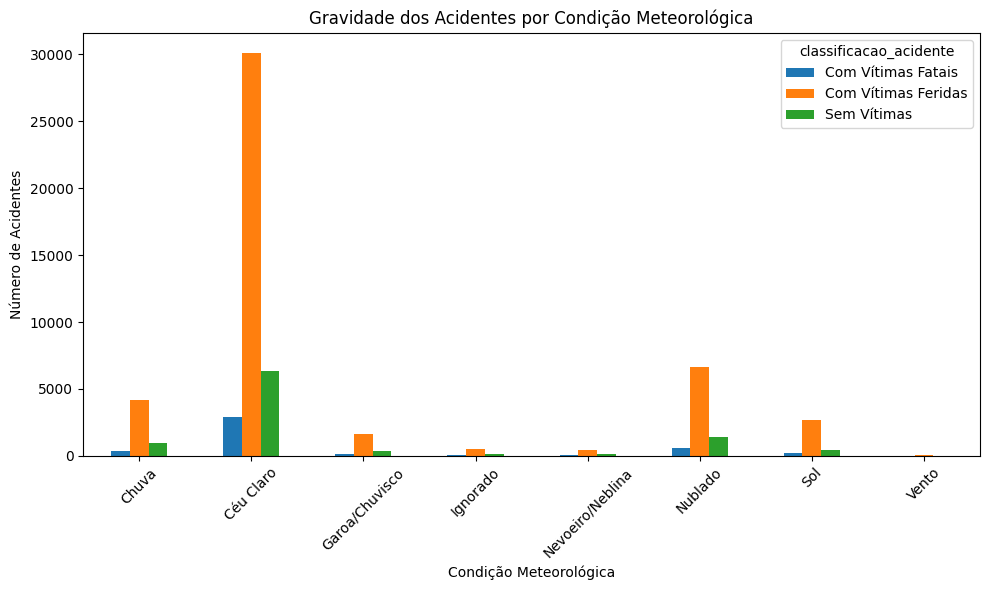

classificacao_acidente
Com Vítimas Fatais      4297.0
Com Vítimas Feridas    46299.0
Sem Vítimas             9768.0
dtype: float64

In [ ]:
# Identificação de Padrões.
gravidade_por_tempo = dados.groupby('condicao_metereologica')['classificacao_acidente'].value_counts().unstack()
gravidade_por_tempo = gravidade_por_tempo.fillna(0)
total_por_condicao = gravidade_por_tempo.sum(axis=1)
gravidade_filtrada = gravidade_por_tempo[total_por_condicao > 3]
gravidade_filtrada.plot(kind='bar',title='Gravidade dos Acidentes por Condição Meteorológica', figsize=(10,6))
plt.ylabel('Número de Acidentes')
plt.xlabel('Condição Meteorológica')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()
gravidade_por_tempo.sum()


In [12]:
#analisar a gravidade dos acidentes separados entre céu claro e chuva
porcentual_ceu_claro = (len(dados[dados['condicao_metereologica']== 'Céu Claro']) / len(dados)) * 100
percentual_chuva = (len(dados[dados['condicao_metereologica']== 'Chuva']) / len(dados)) * 100
print(f'Céu Claro:{porcentual_ceu_claro:.1f}%\nChuva:{percentual_chuva:.1f}%\n')


Céu Claro:65.2%
Chuva:9.1%



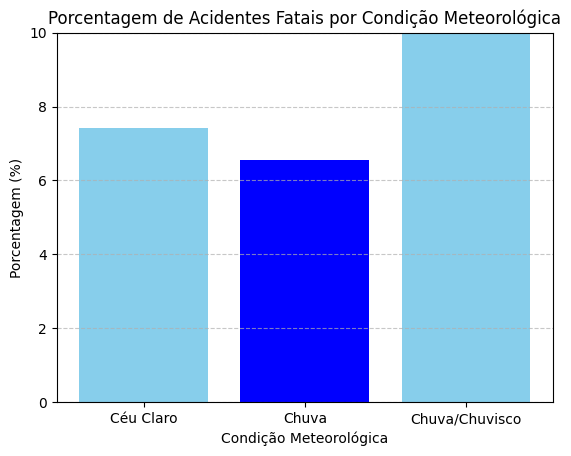

17.206863679694948


In [ ]:
ceu_claro = dados[dados['condicao_metereologica'] == 'Céu Claro']
chuva = dados[dados['condicao_metereologica'] == 'Chuva']
chuvisco = dados[dados['condicao_metereologica'] == 'Garoa/Chuvisco']

ceu_claro_fatais = len(ceu_claro[ceu_claro['mortos'] > 0 ])
chuva_fatais = len(chuva[chuva['mortos'] > 0])
chuvisco_fatais = len(chuvisco[chuvisco['mortos'] > 0])

total_ceu_claro = len(ceu_claro)
total_chuva = len(chuva)
total_chuvisco = len(chuvisco)

porcentagem_fatais_ceu_claro = (ceu_claro_fatais/total_ceu_claro)*100
porcentagem_fatais_chuva = (chuva_fatais/total_chuva)*100
porcentagem_chuvisco = (chuva_fatais/total_chuvisco)*100

condicoes = ['Céu Claro', 'Chuva','Chuva/Chuvisco']
porcentagens = [porcentagem_fatais_ceu_claro, porcentagem_fatais_chuva,porcentagem_chuvisco]

plt.bar(condicoes,porcentagens, color=['skyblue', 'blue'])
plt.title('Porcentagem de Acidentes Fatais por Condição Meteorológica')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Condição Meteorológica')
plt.ylim(0, 10) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print(porcentagem_chuvisco)



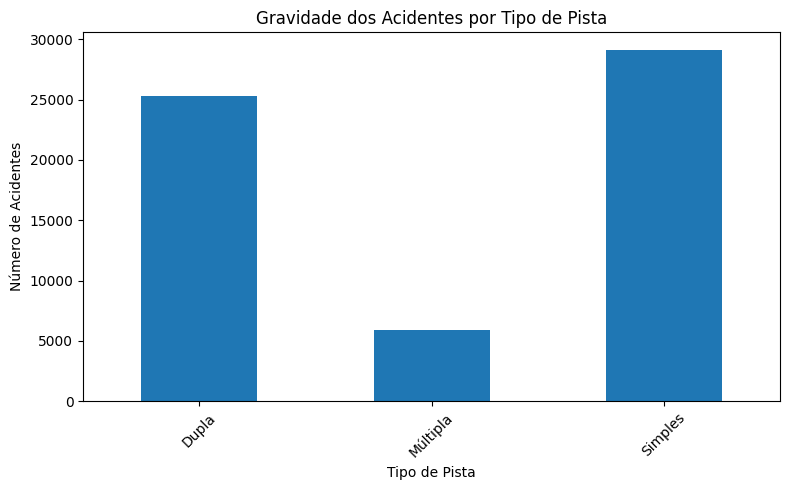

In [ ]:
gravidade_por_tipo_de_pista = dados.groupby('tipo_pista')['classificacao_acidente'].value_counts().unstack()
total_por_condiçao_pista = gravidade_por_tipo_de_pista.sum(axis=1)
total_por_condiçao_pista.plot(kind='bar',title='Gravidade dos Acidentes por Tipo de Pista', figsize=(8,5))
plt.ylabel('Número de Acidentes')
plt.xlabel('Tipo de Pista')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


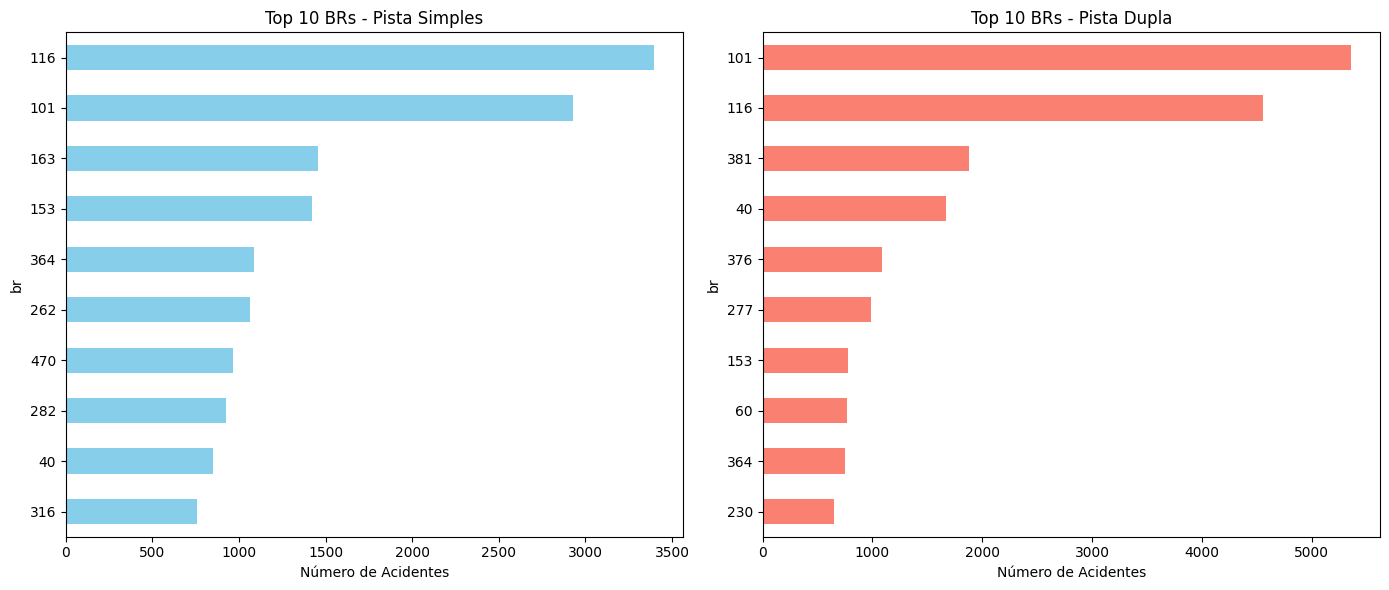

In [ ]:
pista_simples=dados[dados['tipo_pista'] == 'Simples']
br_simples = pista_simples['br'].value_counts().head(10)

pista_dupla = dados[dados['tipo_pista'] == 'Dupla']
br_dupla = pista_dupla['br'].value_counts().head(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para pista simples
br_simples.plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 BRs - Pista Simples')
axs[0].set_xlabel('Número de Acidentes')
axs[0].invert_yaxis() 

# Gráfico para pista dupla
br_dupla.plot(kind='barh', ax=axs[1], color='salmon')
axs[1].set_title('Top 10 BRs - Pista Dupla')
axs[1].set_xlabel('Número de Acidentes')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()



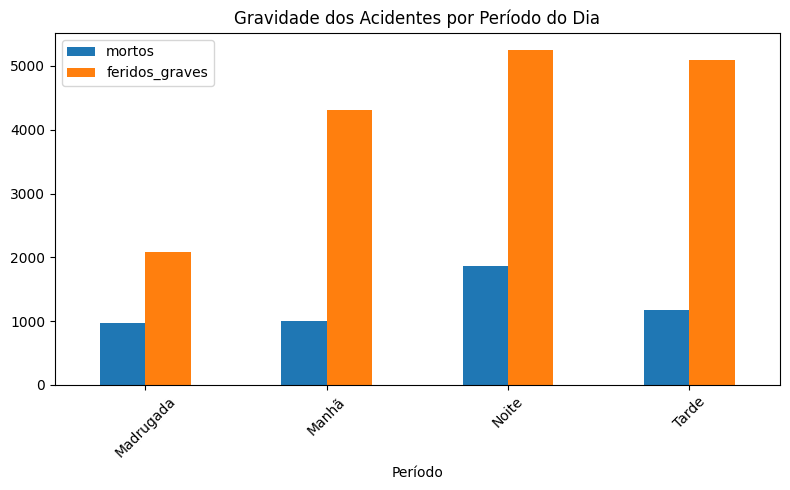

In [ ]:
def faixa_horário(hora):
    if hora < 6:
        return 'Madrugada'
    elif hora < 12:
        return 'Manhã'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noite'
    

dados['horario'] = pd.to_datetime(dados['horario'],format='%H:%M:%S',errors='coerce')
dados['hora'] = dados['horario'].dt.hour
dados['periodo'] = dados['hora'].apply(faixa_horário)

gravidade_por_periodo = dados.groupby('periodo')[['mortos', 'feridos_graves']].sum()

gravidade_por_periodo.plot(kind='bar', title='Gravidade dos Acidentes por Período do Dia', figsize=(8,5))
plt.xlabel('Período')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


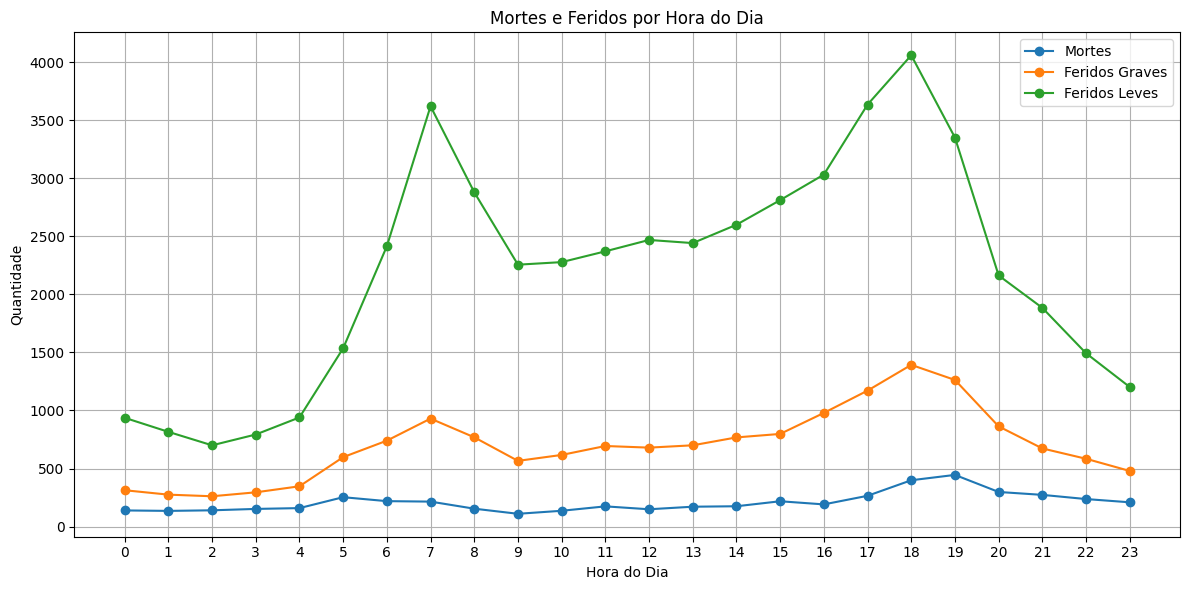

In [23]:
mortes_por_hora = dados.groupby('hora')['mortos'].sum()
feridos_graves_por_hora = dados.groupby('hora')['feridos_graves'].sum()
feridos_leves_por_hora = dados.groupby('hora')['feridos_leves'].sum()

plt.figure(figsize=(12, 6))
plt.plot(mortes_por_hora, label='Mortes', marker='o')
plt.plot(feridos_graves_por_hora, label='Feridos Graves', marker='o')
plt.plot(feridos_leves_por_hora,label='Feridos Leves',marker='o')
plt.title('Mortes e Feridos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

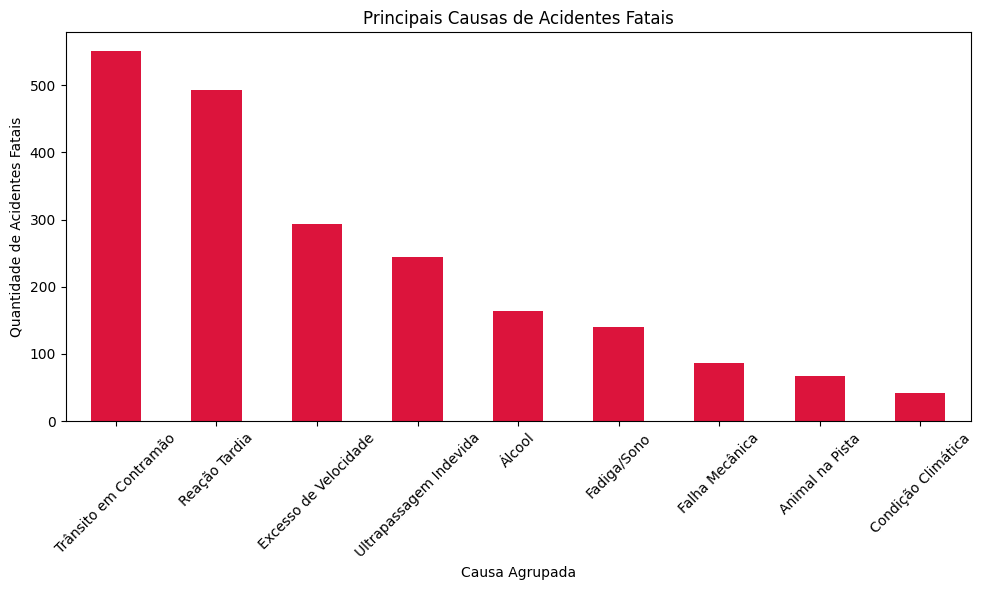

In [18]:
#Análise textual
dados['causa_limpa'] = dados['causa_acidente'].str.lower()
dados['causa_limpa'] = dados['causa_limpa'].str.replace(r'[^\w\s]', '', regex=True)

def categorizar_causa(causa):
    if 'álcool' in causa or 'bebida' in causa:
        return 'Álcool'
    elif 'sono' in causa or 'cansaço' in causa or 'fadiga' in causa or 'dormindo' in causa:
        return 'Fadiga/Sono'
    elif 'Velocidade' in causa or 'excesso' in causa or 'incompatível' in causa:
        return 'Excesso de Velocidade'
    elif 'ultrapassagem' in causa:
        return 'Ultrapassagem Indevida'
    elif 'freio' in causa or 'falha' in causa or 'eletrica' in causa or 'pneu' in causa:
        return 'Falha Mecânica'
    elif 'chuva' in causa or 'tempo' in causa:
        return 'Condição Climática'
    elif 'contramão' in causa:
        return 'Trânsito em Contramão'
    elif 'reação' in causa and 'tardia' in causa:
        return 'Reação Tardia'
    elif 'animal' in causa or 'animais' in causa:
        return 'Animal na Pista'
    elif 'desatenção' in causa or 'distracao' in causa:
        return 'Desatenção'
    else:
        return 'Outros'
    
dados['categoria_causa'] = dados['causa_limpa'].apply(categorizar_causa)
causas_fatais = dados[dados['mortos'] > 0]['categoria_causa'].value_counts()
dados_filtrados = causas_fatais[causas_fatais.index != 'Outros']


dados_filtrados.plot(kind='bar', title='Principais Causas de Acidentes Fatais', figsize=(10,6), color='crimson')
plt.ylabel('Quantidade de Acidentes Fatais')
plt.xlabel('Causa Agrupada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
from collections import Counter

palavras = ' '.join(dados[dados['categoria_causa'] == 'Outros']['causa_limpa']).split()
contagem = Counter(palavras)
print(contagem.most_common(30))

[('de', 21102), ('do', 13993), ('a', 13537), ('condutor', 13381), ('ausência', 8965), ('reação', 8804), ('sem', 5823), ('presença', 5823), ('acessar', 5768), ('via', 5768), ('observar', 5768), ('dos', 5768), ('outros', 5768), ('veículos', 5768), ('da', 4284), ('faixa', 3956), ('deixou', 3731), ('manter', 3731), ('distância', 3731), ('veículo', 3731), ('frente', 3731), ('manobra', 3491), ('mudança', 3491), ('pista', 1723), ('no', 1691), ('ou', 1670), ('pedestre', 1583), ('o', 1222), ('sobre', 1207), ('desrespeitar', 1140)]


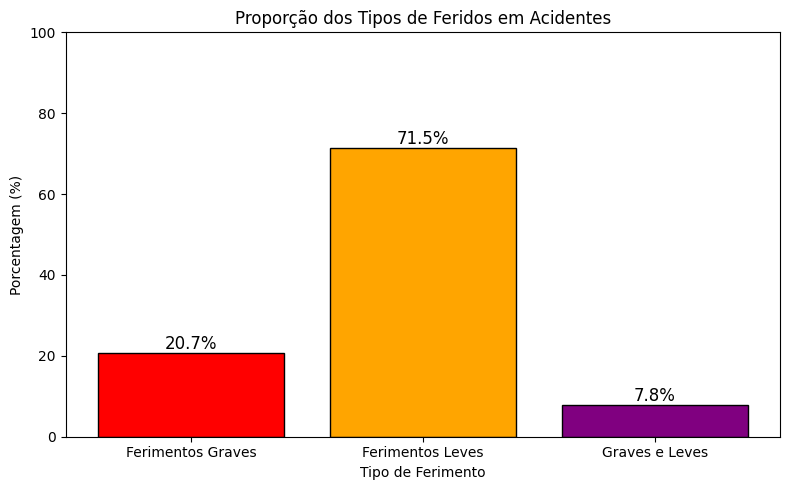

In [ ]:
# Cálculo do total de acidentes com feridos
total_feridos = len(feridos_graves) + len(feridos_leves) + len(ambos)


proporcoes = [
    len(feridos_graves) / total_feridos * 100,
    len(feridos_leves) / total_feridos * 100,
    len(ambos) / total_feridos * 100
]


categorias = ['Ferimentos Graves', 'Ferimentos Leves', 'Graves e Leves']


plt.figure(figsize=(8, 5))
plt.bar(categorias, proporcoes, color=['red', 'orange', 'purple'], edgecolor='black')


plt.title('Proporção dos Tipos de Feridos em Acidentes')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Tipo de Ferimento')
plt.ylim(0, 100)
for i, valor in enumerate(proporcoes):
    plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('Proporção dos Tipos de Feridos em Acidentes.png')
plt.show()



In [21]:
quantidade_mortos = dados['mortos'].sum()
quantidades_feridos = dados['feridos'].sum()
print(quantidade_mortos)
print(quantidades_feridos)


5016
69442
